线性规划——投资收益

In [22]:
from scipy.optimize import linprog
from matplotlib import pyplot as plt
import numpy as np
from numpy import ones, diag, c_, zeros  #用于创建和操作数组

#设置matplotlib的参数使其支持Latex文本和字体大小
plt.rc(group='text',usetex=True)
plt.rc(group='font',size=16)

In [23]:
#目标函数系数
c = [-0.05,-0.27,-0.19,-0.185,-0.185]
#不等式约束的系数矩阵
A = c_[zeros((4,1)),diag([0.025,0.015,0.055,0.026])]  #c_ 用于按列拼接，要求拼接的数组行数一致。

#等式约束的系数矩阵和右侧的值
Aeq = [[1,1.01,1.02,1.045,1.065]]
beq = [1]

In [24]:
#初始化参数a，以及两个用于存储结果的空列表
a = 0
aa = []
ss = []
#初始化一个空数组
X = np.empty((0,5))
#循环
while a<0.05:
    #创建线性不等式右侧的值b
    b = ones((4,1)) * a
    #执行线性规划
    res = linprog(c, A, b, Aeq, beq,bounds=[(0,None),(0,None),(0,None),(0,None),(0,None)])
    #提取解向量x和最优值Q
    x = res.x
    # print(x)
    Q = -res.fun
    #将当前的解向量和最优值存入列表
    aa.append(a)
    ss.append(Q)
    #将解向量存储在一个矩阵中
    X = np.vstack((X,x))
    
    a = a+0.001

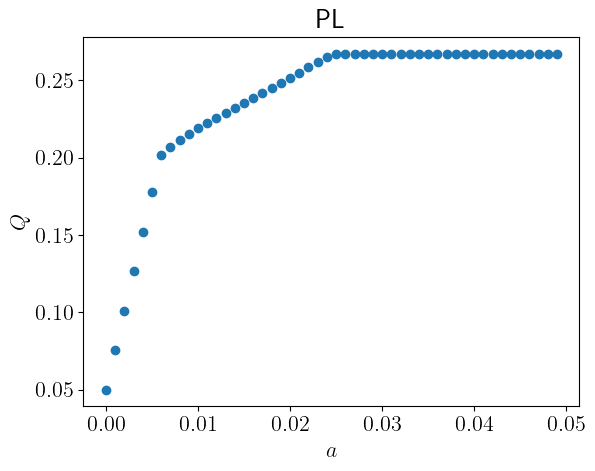

[[ 1.         -0.         -0.         -0.         -0.        ]
 [ 0.83163846  0.04        0.06666667  0.01818182  0.03846154]
 [ 0.66327692  0.08        0.13333333  0.03636364  0.07692308]
 [ 0.49491538  0.12        0.2         0.05454545  0.11538462]
 [ 0.32655385  0.16        0.26666667  0.07272727  0.15384615]
 [ 0.15819231  0.2         0.33333333  0.09090909  0.19230769]
 [ 0.          0.24        0.4         0.10909091  0.22122066]
 [ 0.          0.28        0.46666667  0.12727273  0.10159624]
 [ 0.          0.32        0.53333333  0.12708134  0.        ]
 [ 0.          0.36        0.6         0.02334928  0.        ]
 [ 0.          0.4         0.58431373  0.          0.        ]
 [ 0.          0.44        0.54470588  0.          0.        ]
 [ 0.          0.48        0.50509804  0.          0.        ]
 [ 0.          0.52        0.4654902   0.          0.        ]
 [ 0.          0.56        0.42588235  0.          0.        ]
 [ 0.          0.6         0.38627451  0.          0.  

In [25]:
plt.scatter(aa,ss)
plt.xlabel('$a$')
plt.ylabel('$Q$')
plt.title('PL')
plt.show()
print(X)